In [1]:
from dataloader import Dataload
from torch.utils.data import DataLoader
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
test_dataloader = Dataload("H:/DATASET/phase2", image_shape = (512,512),dataset_type = "val",keep_same = False,shuffle = False)

H:/DATASET/phase2/valset/ H:/DATASET/phase2/valset_label.txt
total: 39986
True 0, False 0, val 39986


In [11]:
f = open("H:/DATASET/phase2/valset_label.txt","r")

In [12]:
len(f.readlines())

40000

In [13]:
f.close()

In [3]:
len(test_dataloader)

39986

In [4]:
for i in test_dataloader:
    a = i
    break

In [9]:
test_dataloader[0]

(tensor([[[1.6778, 1.6778, 1.6302,  ..., 2.0112, 2.0112, 2.0112],
          [1.5985, 1.6461, 1.6620,  ..., 2.0112, 2.0112, 2.0112],
          [1.4715, 1.5667, 1.6461,  ..., 2.0112, 2.0112, 2.0112],
          ...,
          [1.5667, 1.5667, 1.5667,  ..., 1.5191, 1.5667, 1.5509],
          [1.5667, 1.5667, 1.5667,  ..., 1.5350, 1.6143, 1.6143],
          [1.5667, 1.5667, 1.5667,  ..., 1.1222, 1.1857, 1.2334]],
 
         [[1.5631, 1.5631, 1.5470,  ..., 2.0302, 2.0302, 2.0302],
          [1.4826, 1.5309, 1.5792,  ..., 2.0302, 2.0302, 2.0302],
          [1.3537, 1.4503, 1.5631,  ..., 2.0302, 2.0302, 2.0302],
          ...,
          [1.3376, 1.3376, 1.3376,  ..., 1.4020, 1.4181, 1.4342],
          [1.3376, 1.3376, 1.3376,  ..., 1.3859, 1.4181, 1.4664],
          [1.3376, 1.3376, 1.3376,  ..., 0.9188, 0.9833, 1.0316]],
 
         [[1.2913, 1.2913, 1.2763,  ..., 1.8010, 1.8010, 1.8010],
          [1.2163, 1.2613, 1.3063,  ..., 1.8010, 1.8010, 1.8010],
          [1.0964, 1.1863, 1.2913,  ...,

In [8]:
a[1]

'H:/DATASET/phase2/valset\\0000b6dba64fc0b1a885b9119444720e.jpg'

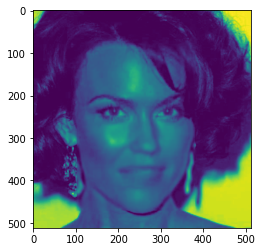

In [7]:
plt.imshow(a[0][0])
plt.show()

In [6]:
import torch

In [15]:
a = torch.randn((32,1,9,9))

In [20]:
t = torch.split(a, 3, dim = 2)

In [29]:
ans = []
for i in t:
    for j in torch.split(i,3, dim=3):
        ans.append(j)

In [51]:
d = torch.cat(ans,1)

In [52]:
d.size()

torch.Size([32, 9, 3, 3])

In [16]:
#train_dataloader = Dataload("H:/DATASET/phase1", dataset_type = "train", keep_same = True, limit = 10000, need_fft = True)
train_dataloader = Dataload("H:/DATASET/phase1", dataset_type = "train",gray=True,image_shape = (512, 512), limit = 10000, need_fft = False)

total: 599709
True 10000, False 10000


In [3]:
test_dataloader = Dataload("H:/DATASET/phase1", dataset_type = "test", limit = 1000,need_fft = True)

total: 39986
True 1000, False 1000


In [28]:
train_loader= DataLoader(
        dataset = train_dataloader,
        batch_size = 1,
        shuffle = True,
        drop_last = True
    )

In [47]:
import torch
import numpy as np
def crop_tensor(image_pack, scale = 3):
    _, _, w, h = image_pack.size()
    a = int(w/scale)
    b = int(h/scale)
    t = torch.split(image_pack, a, dim = 2)
    ans = []
    for i in t:
        ans.append(torch.split(i,b, dim=3))
    ans_flat = []
    for i in range(scale):
        for j in range(scale):
            ans_flat.append(ans[i][j])
    return ans_flat

In [29]:
temp_max = [0,0,0] 

for i in train_loader:
    a = i
    break
#     for j in range(3):
#         t =  a[j+2].max()
#         if temp_max[j] < t:
#             temp_max[j] = t
            
    

In [30]:
a[1]

tensor([1.])

In [31]:
a[0].size()

torch.Size([1, 1, 512, 512])

In [48]:
d = crop_tensor(a[0])

In [49]:
len(d)

9

In [45]:
d[0].size()

torch.Size([1, 1, 256, 256])

0
1
2
3
4
5
6
7
8


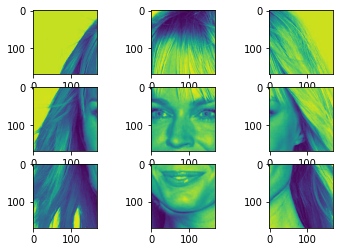

In [50]:
for i in range(len(d)):
    print(i)
    ax1 = plt.subplot(3, 3, i+1)
    plt.imshow(d[i][0][0])
plt.show()

In [29]:
a[3].max()

tensor(491.6283)

In [11]:
a[1]

tensor([1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.])

In [14]:
a = np.array([-1,0,0],dtype=np.float32)
b = np.array([0,2,3],dtype = np.float32)
a += 1
b += 1
d = cv2.magnitude(a,b)
np.log(d)

array([[0.       ],
       [1.1512926],
       [1.4166067]], dtype=float32)

In [44]:
d

array([[1.       ],
       [2.828427 ],
       [4.2426405]], dtype=float32)

In [7]:
1 in a

True

In [15]:
a

array([0., 1., 1.], dtype=float32)

In [16]:
a[a==0] += 0.1

In [17]:
a

array([0.1, 1. , 1. ], dtype=float32)